In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [33]:
# Loadgin files 
folder = 'data/'
Y_high = pd.read_csv(folder+'Y_high.csv')
Y_low = pd.read_csv(folder+'Y_low.csv')
X_high = pd.read_csv(folder+'X_high.csv')
X_low = pd.read_csv(folder+'X_low.csv')
high = pd.concat([X_high,Y_high],axis=1)
#high =  high[['it', 'emestar', 'rc', 'qest', 'sigmag_0', 'emed',
#       'apert', 'emetal', 'taugas', 'Unnamed: 0', 'num_planets', 'solid_mass',
#       'mass_efficiency']]
low = pd.concat([X_low,Y_low],axis=1)
#low =  low[['it', 'emestar', 'rc', 'qest', 'sigmag_0', 'emed',
#       'apert', 'emetal', 'taugas', 'Unnamed: 0', 'num_planets', 'solid_mass',
#       'mass_efficiency']]
total = low.append(high)
#total = total[['it', 'emestar', 'rc', 'qest', 'sigmag_0', 'emed',
#       'apert', 'emetal', 'taugas', 'num_planets', 'solid_mass',
#       'mass_efficiency']]


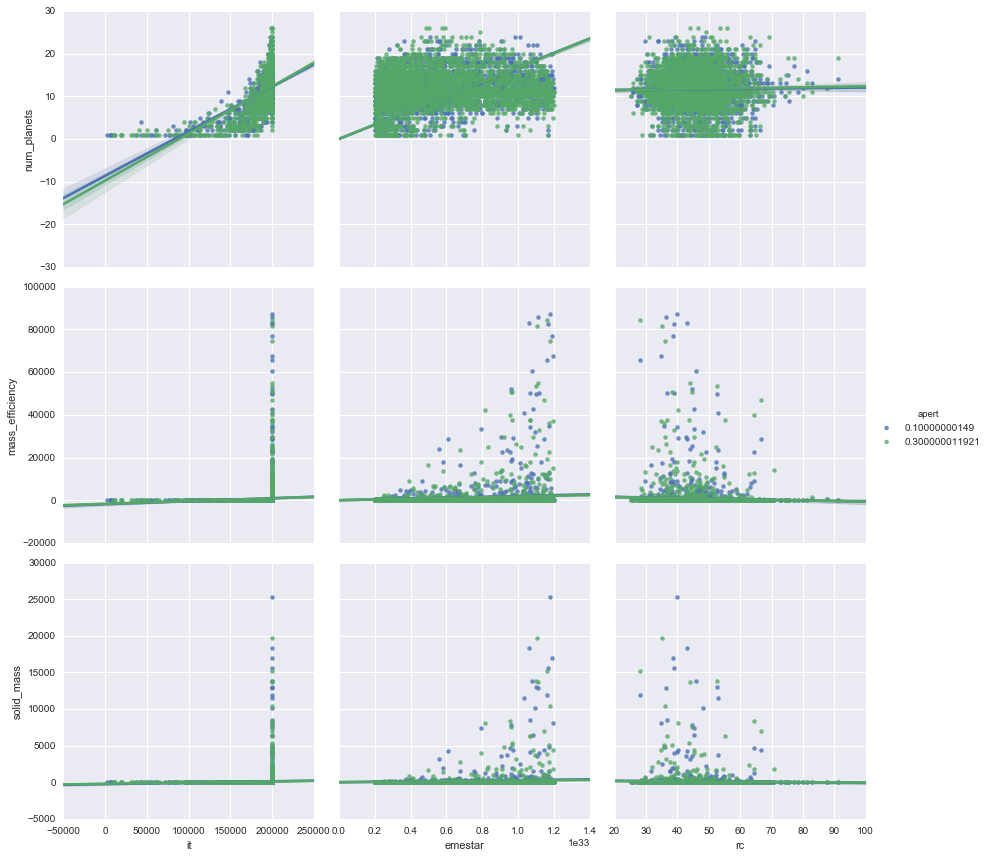

In [34]:
sns.pairplot(total,hue="apert", x_vars=['it', 'emestar', 'rc'], y_vars=['num_planets','mass_efficiency','solid_mass'],size=4, kind='reg')

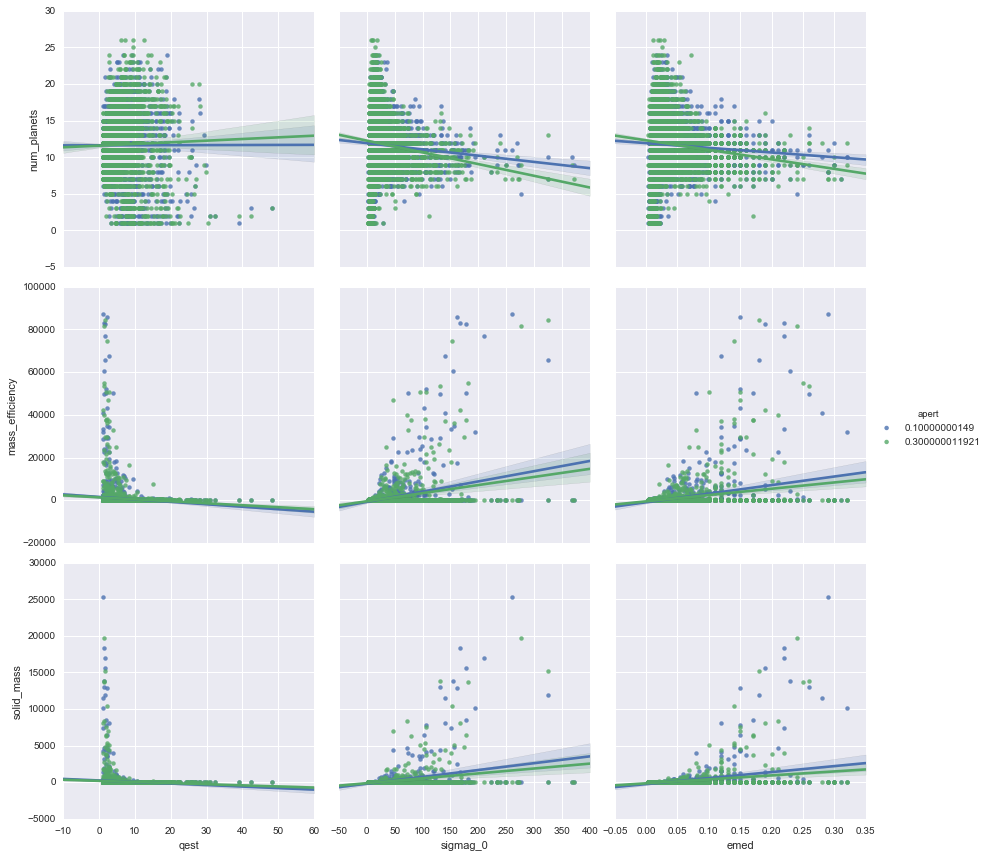

In [35]:
sns.pairplot(total,hue="apert", x_vars=['qest', 'sigmag_0', 'emed'], y_vars=['num_planets','mass_efficiency','solid_mass'],size=4, kind='reg')

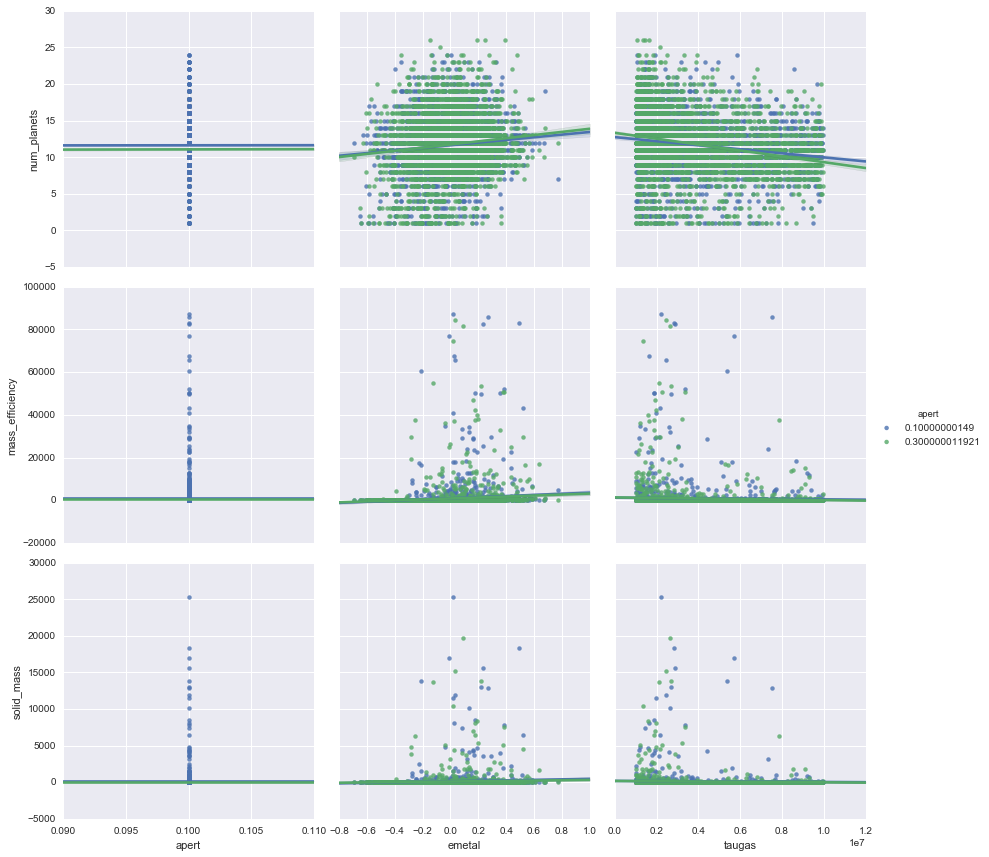

In [36]:
sns.pairplot(total,hue="apert", x_vars=['apert', 'emetal','taugas'], y_vars=['num_planets','mass_efficiency','solid_mass'],size=4, kind='reg')

In [37]:
from sklearn import linear_model

In [38]:
# Scale data with the same cross validation groups

scaler1 = preprocessing.StandardScaler().fit(X_high)
X_high = scaler1.transform(X_high)
Y_high = (Y_high - np.mean(Y_high))/np.std(Y_high)

In [39]:
X_high_train, X_high_test, Y_high_train, Y_high_test = train_test_split(X_high, Y_high, random_state=1)
shape(X_high)

(2770, 9)

In [56]:
# Define again appropriate values of lambda
n_lassos = 200
lassos = np.linspace(0.001,0.5,n_lassos)
n_betas = 10
betas = np.zeros((n_lassos,n_betas))
R2_test = np.zeros((n_lassos))
R2_train = np.zeros((n_lassos))
for i in range(n_lassos):
    # Fit model
    clf = linear_model.Lasso(alpha=lassos[i])
    clf.fit(X_high_train, Y_high_train['num_planets'])
    betas[i,1:] = clf.coef_
    betas[i,0] = clf.intercept_
    # Score test
    R2_train[i] = clf.score(X_high_train, Y_high_train['num_planets'])
    # Score Training
    R2_test[i] = clf.score(X_high_test, Y_high_test['num_planets'])


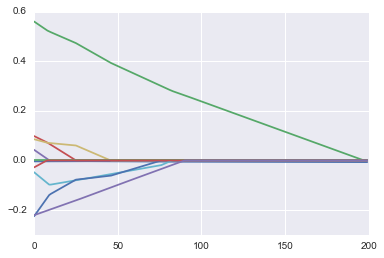

In [59]:
plot(betas)

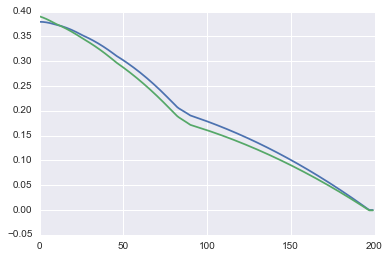

In [60]:
plot(R2_train)
plot(R2_test)